# The Boston house prices dataset 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import scipy.optimize as opt
from sklearn.metrics import mean_squared_error

In [2]:
data = load_boston() # load the dataset
data # visualize the dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Merge features and targets into one single dataset 

feats = pd.DataFrame(data["data"], columns = data["feature_names"]) # features

targs = pd.DataFrame(data["target"], columns = ["Price"]) # target

boston_house = pd.concat([feats, targs], axis = 1)

boston_house.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Compute the median and the median absolute deviation (MAD) of each column

med_mad = []

for column in boston_house.columns:
    item1 = round(np.median(boston_house[column]),2)
    item2 = round(pd.Series(boston_house[column]).mad(),2)
    med_mad.append([item1,item2])
            
cols = ["Median", "MAD"]

med_mad_dt = pd.DataFrame(med_mad, index = boston_house.columns, columns = cols)

med_mad_dt


,Median,MAD
CRIM,0.26,4.78
ZN,0.00,16.71
INDUS,9.69,6.20
CHAS,0.00,0.13
NOX,0.54,0.10
RM,6.21,0.51
AGE,77.50,24.61
DIS,3.21,1.72
RAD,5.00,7.54
TAX,330.00,143.59


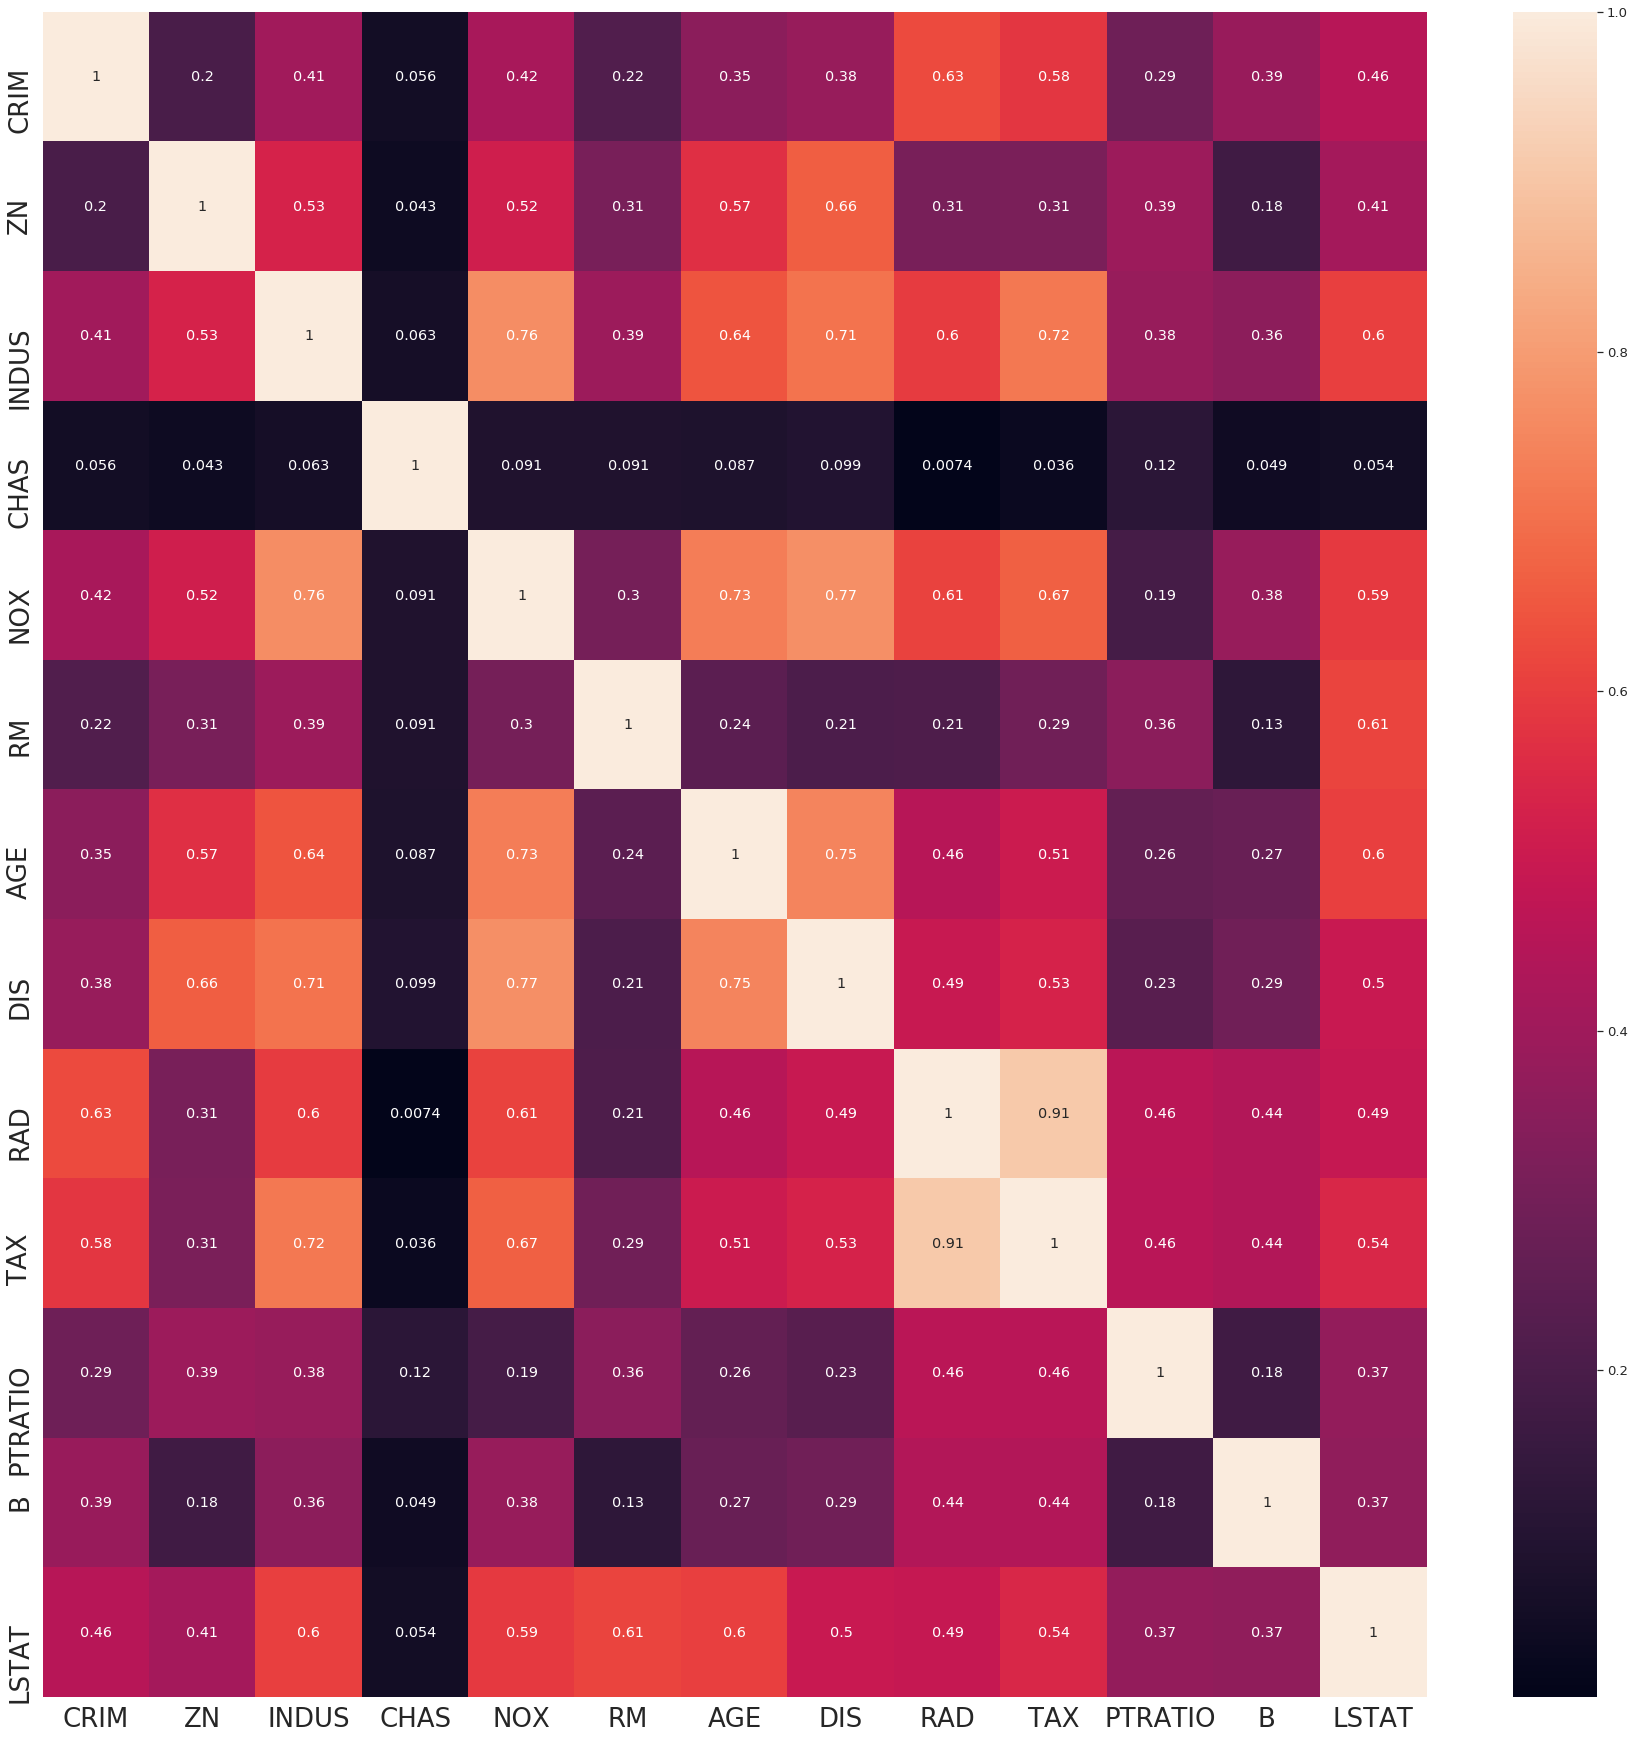

In [5]:
# Check the correlation matrix, using the Pearson method (robust to possible outliers)

plt.figure(figsize = (31,31))
sn.set(font_scale = 1.2)
sn.heatmap(abs(feats.corr(method = "pearson")), annot = True)
plt.tick_params(labelsize=26)
plt.show()

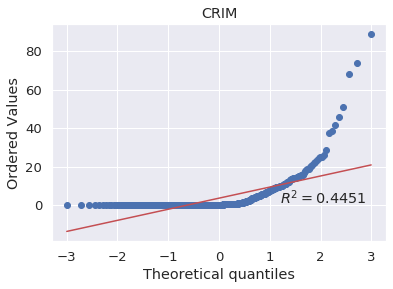

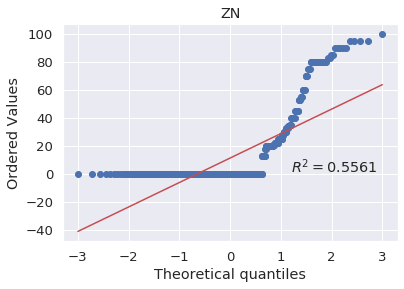

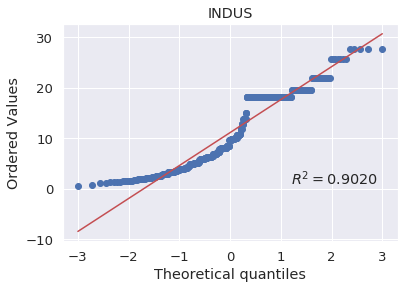

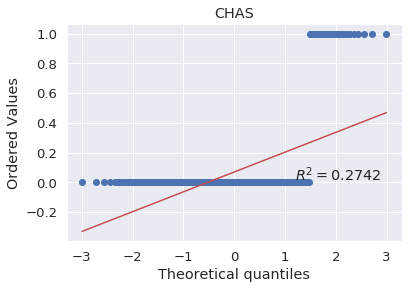

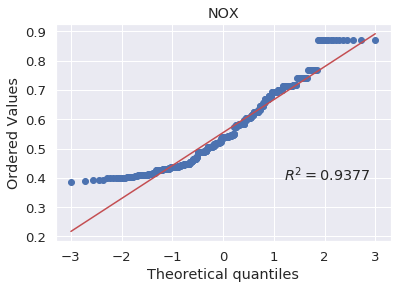

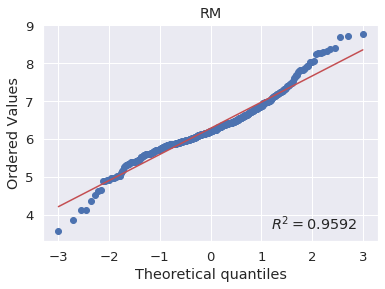

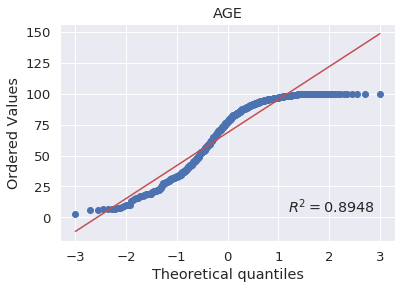

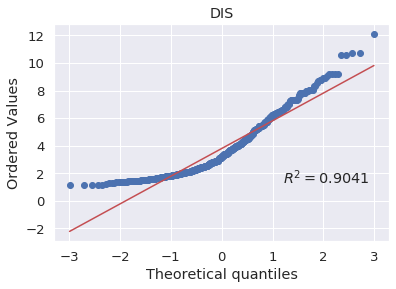

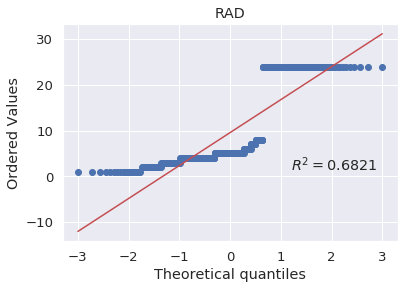

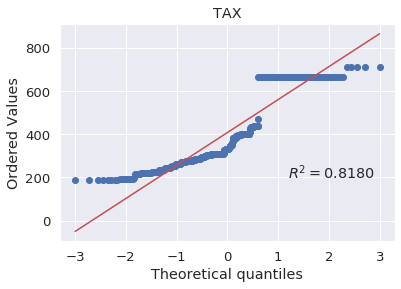

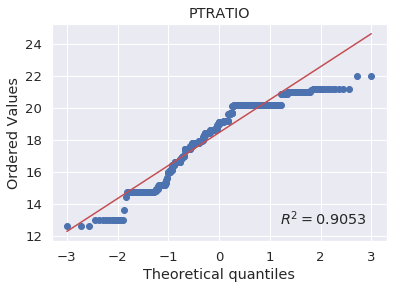

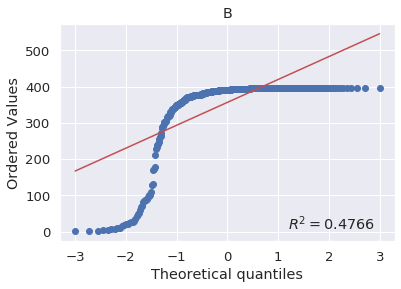

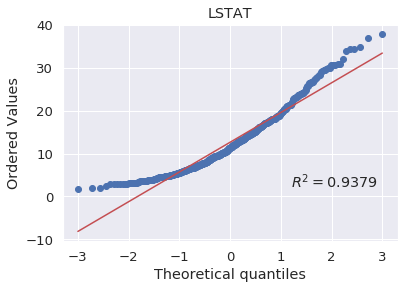

In [6]:
# Check whether there is normally distributed data

for i in range(13):
    stats.probplot(feats[feats.columns[i]], dist="norm", plot=plt, rvalue=True)
    plt.title(feats.columns[i])
    plt.show()

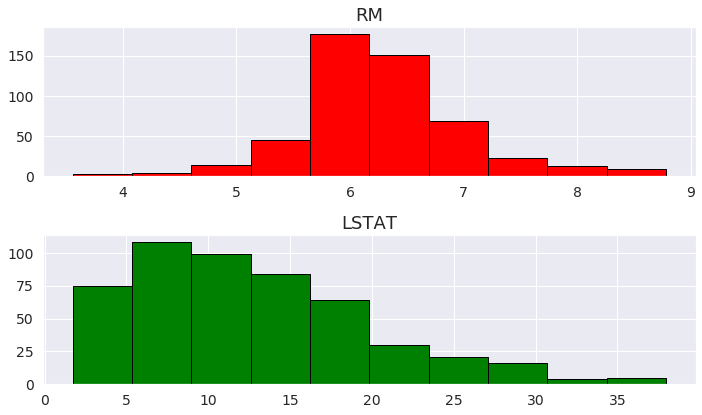

In [7]:
# Plot the two columns that might be normally distributed

fig = plt.figure(figsize = (10,6))

plt.subplot(211)
plt.hist(feats["RM"], color="red", edgecolor="black")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("RM", fontsize = 18)

plt.subplot(212)
plt.hist(feats["LSTAT"], color="green", edgecolor="black")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("LSTAT", fontsize = 18)

plt.tight_layout()
plt.show()

In [8]:
# Scale the features through the Standard Scaler

scale_feats = StandardScaler().fit_transform(feats)

In [9]:
# Split the dataset into training and test set 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scale_feats, targs, test_size = 1/3, random_state = 1)


In [10]:
# Try some support vector machine regressors

from sklearn.svm import SVR 

def svr_param_selection(X, y, nfolds):
    kernels = ["rbf", "sigmoid"]
    Cs = [0.001, 0.01, 0.1, 1, 10, 1e+2, 1e+3, 1e+4, 1e+5]
    gammas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e+1,1]
    param_grid = {'kernel': kernels, 'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    pred_targets = grid_search.predict(X)
    return round(grid_search.best_score_,2)

In [11]:
# Get the best score 

print("Best score of the best model: {} %".format(100*svr_param_selection(scale_feats, np.ravel(targs), 10)))

Best score of the best model: 61.0 %


In [12]:
# Try out the random forest regressor 

rf = RandomForestRegressor(n_estimators = 1500)
np.random.seed(0)
rf.fit(x_train, np.ravel(y_train))
preds = rf.predict(x_test)
print("Score: {} %".format(round(100*rf.score(x_test, np.ravel(y_test))),2)) # to get 
print("R2 score: {}".format(round(r2_score(preds, y_test),2)))
print("Mean squared error: {}".format(round(mean_squared_error(y_test, preds),2)))

Score: 89.0 %
R2 score: 0.87
Mean squared error: 9.48


In [13]:
# Storing the test labels into a numpy array

test_labels = []

for item in np.asarray(y_test):
    test_labels.append(item[0])
    
test_labels = np.asarray(test_labels)

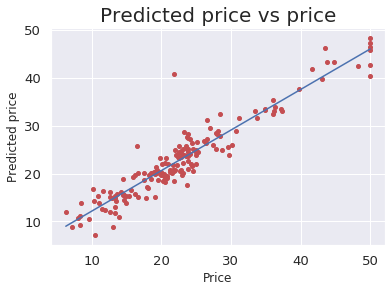

Slope m =  0.8480046551621012 , intercept q =  3.6592049128827564


In [14]:
# Represent the predicted price vs the actual price and fit the data with a linear function

def line(x,m,q):
    return m*x+q

popt, pcov = opt.curve_fit(line, test_labels, preds)
plt.plot(test_labels, preds, 'ro', markersize = 4)
plt.plot(np.unique(test_labels), np.poly1d(np.polyfit(test_labels, preds, 1))(np.unique(test_labels)))
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Predicted price", fontsize = 12)
plt.title("Predicted price vs price", fontsize = 20)
plt.show()

print("Slope m = ", popt[0], ", intercept q = ", popt[1]) 